Далее идут строки импортов и настройки pandas

In [160]:
from pandas import DataFrame, set_option, Series
from matplotlib import pyplot as plt
import numpy as np

from utils.load import load_middleware
from utils.my_argparse import setup_basic_config
from utils.write import write_middleware

set_option('display.max_rows', None)
set_option('display.max_columns', None)
set_option('display.max_colwidth', None)

# Getting arguments from command line
args = setup_basic_config()

# Getting values from table
dataset: DataFrame = load_middleware(args.input_from)

    Loading E:\PythonProjects\projects\mlYandex\source\csv\datasets_eat_places.csv
    End of data loading


In [161]:
def add_signatures(pct: float | int, allvals: Series, string_type: str):
    """
    :param pct: the value required in the signature
    :param allvals: col in a Table
    :param string_type: customizing signature
    :return:

    Function, that return formatted string
    """



    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} {})".format(pct, absolute, string_type)

Далее функция, которая выполняет задания подпункта 2

Вызовите метод info(), чтобы увидеть число пропущенных значений
Очистите датасет от всех заведений, у которых средний чек неизвестен или превышает 2500
Далее заполните оставшиеся пропуски средними значениями с помощью fillna()

In [162]:
def point_two(dataset: DataFrame) -> DataFrame:
    """
    :param dataset: DataFrame obj of table
    :return:
    """

    # Showing info about non-null values
    # (To see missed values (43195-non-null) values)
    # print(dataset.info(show_counts=True))

    # Drop rows from the DataFrame, where average_bill is null or more than 2500
    dataset_with_filter = dataset.query(
        'average_bill != None and average_bill <= 2500'
    )

    # fill in the remaining gaps with average values
    return dataset_with_filter.fillna(dataset_with_filter.mean(numeric_only=True))


# Point Two
print("\nPOINT TWO\n")
dataset = point_two(dataset)


POINT TWO



Далее функция, которая выполняет задания подпункта 3

Каких заведений больше - из Москвы или Санкт-Петербурга? Какие типы заведений есть в датасете?
Сколько в датасете суммарно ресторанов и пабов? Какой у них средний чек?
Какая доля заведений “Кофе с собой” действительно имеет фичу кофе на вынос?
Найдите разницу между средним чеком всех кафе в Москве и Санкт-Петербурге.


POINT THREE

    Maximum cafes in City: "msk" Count: "11075"


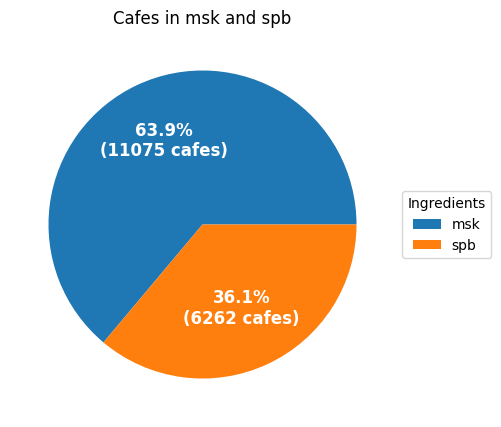


    Types of cafes in msk and spb:

    Быстрое питание               Пиццерия
    Столовая                      Спортбар
    Суши-бар                      Кофе с собой
    Кофейня                       Кальян-бар
    Кондитерская                  Бар безалкогольных напитков
    Булочная, пекарня             Кафе
    Ресторан                      Бар, паб


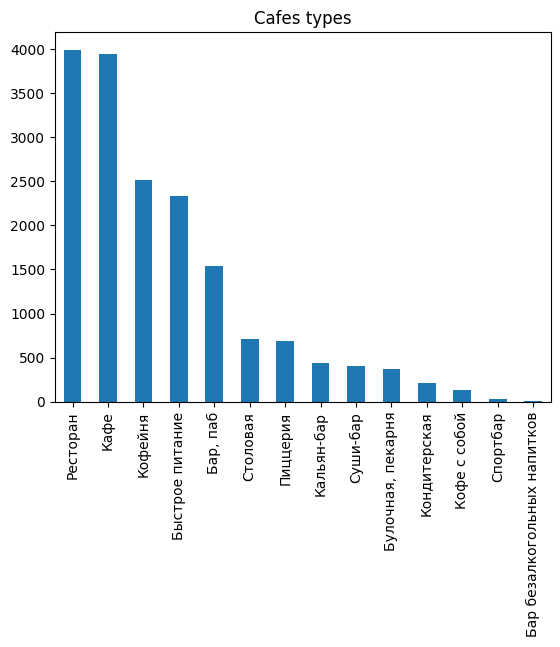


    Average Bill of Cafes: 1099.1

    The share of "Coffee with you” establishments has a takeaway coffee feature: 0.59 (in percents is 59.0%)

    Average Bill Difference between msk and spb: 94.73


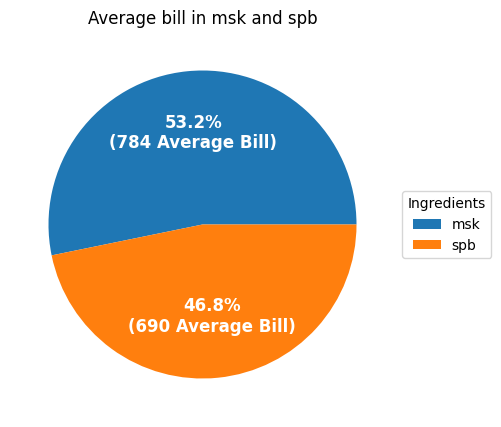

In [163]:
def point_three(dataset: DataFrame) -> None:
    """
    :param dataset: DataFrame obj of table
    :return:
    """

    # Showing counts of coffee shops in sbp and msk
    format_string = 'Maximum cafes in City: "{}" Count: "{}"'
    cities = dataset["city"].value_counts()
    print(f'    {format_string.format(*max(cities.items(), key=lambda x: x[1]))}')

    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    plt.title('Cafes in msk and spb')
    wedges, _, autotexts = ax.pie(cities, autopct=lambda pct: add_signatures(pct, cities, 'cafes'), textprops=dict(color="w"))
    plt.setp(autotexts, size=12, weight="bold")
    ax.legend(wedges, cities.keys(),
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

    # Showing types of coffee shops
    # (I'm sorting it by len because I like it)

    coffee_shop_types = list(set(dataset["rubric"].tolist()))

    print('\n    Types of cafes in msk and spb:\n')
    key_len = 30
    for i in range(0, len(coffee_shop_types), 2):
        words = coffee_shop_types[i:i + 2]
        summary_len = key_len - len(words[0])
        print("    " + f"{' ' * (summary_len)}".join(words))

    plt.title('Cafes types')
    dataset["rubric"].value_counts().plot(kind='bar')
    plt.show()

    keys = {'Ресторан', 'Бар, паб'}

    # getting average bill
    value = round(dataset.query(f"rubric in {tuple(keys)}")["average_bill"].mean(), 2)
    print(f'\n    Average Bill of Cafes: {value}')

    coffee_to_go = dataset.query('rubric == "Кофе с собой"')
    coffee_to_go_percent = round(coffee_to_go['coffee_to_go'].mean(), 2)

    # The share of "Coffee with you" establishments has a takeaway coffee feature Bill
    print(f'\n    The share of "Coffee with you” establishments has a takeaway coffee feature: '
          f'{coffee_to_go_percent} (in percents is {coffee_to_go_percent * 100}%)')
    
    msk_sbp = dataset.groupby('city')['average_bill'].mean(numeric_only=True)
    print(f'\n    Average Bill Difference between msk and spb: {round(msk_sbp["msk"] - msk_sbp["spb"], 2)}')

    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    wedges, _, autotexts = ax.pie(msk_sbp, autopct=lambda pct: add_signatures(pct, msk_sbp, 'Average Bill'), textprops=dict(color="w"))
    ax.legend(wedges, msk_sbp.keys(),
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")
    plt.title('Average bill in msk and spb')
    plt.show()



# Point Three
print("\nPOINT THREE\n")
point_three(dataset)

Далее функция, которая выполняет задания подпункта 4

Вызовите метод describe() и напишите 2-3 своих наблюдения. Например, какая фича самая редкая?


POINT FOUR

    There is an institution whose rating is 0
    Feature occurs min times is "pets"
    Feature occurs max times is "wi_fi"


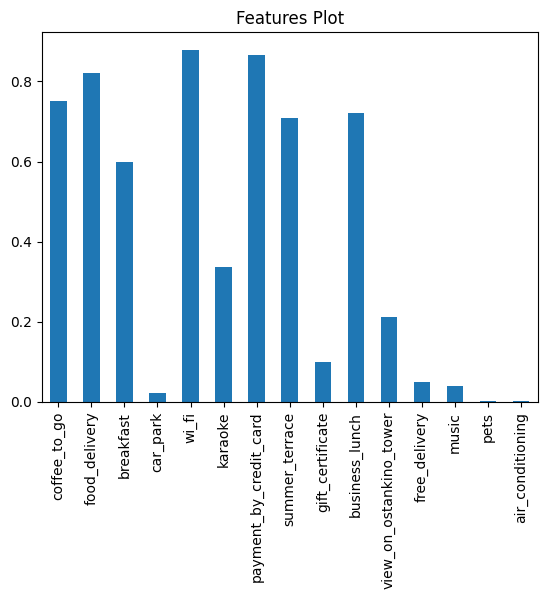

In [164]:
def point_four(dataset: DataFrame) -> None:
    """
    :param dataset: DataFrame obj of table
    :return:
    """
    
    # display(dataset[features_names].describe(include="all"))

    features_names = [
        'coffee_to_go', 'food_delivery', 'breakfast', 'car_park', 'wi_fi', 'karaoke',
        'payment_by_credit_card', 'summer_terrace', 'gift_certificate', 'business_lunch',
        'view_on_ostankino_tower', 'free_delivery', 'music', 'pets', 'air_conditioning'
    ]
    
    features = dataset[features_names].describe(include="all")
    
    min_feature = min(features_names, key=lambda x: features[x]['mean'])
    max_feature = max(features_names, key=lambda x: features[x]['mean'])

    print(
        f'    There is an institution whose rating is 0\n'
        f'    Feature occurs min times is "{min_feature}"\n'
        f'    Feature occurs max times is "{max_feature}"'
    )

    plt.title('Features Plot')
    features.T['mean'].plot(kind='bar')
    plt.show()

# Point Four
print("\nPOINT FOUR\n")
point_four(dataset)

Далее функция, которая выполняет задания подпункта 5

Как изменился средний чек ресторанов?
Что еще можно сказать об изменениях в других столбцах? Напишите 1-2 наблюдения.

In [165]:
def point_five(dataset: DataFrame):
    """
    :param dataset: DataFrame obj of table
    :return:
    """

    dataset = dataset.query('city == "spb"')
    # creating new table
    write_middleware('spb_datasets_eat_places.csv', dataset)
    # write_middleware('spb_datasets_eat_places.xlsx', dataset)

    print(f'\n    Average Bill: {round(dataset["average_bill"].mean(), 2)} (it has shrunk)')
    print(f'\n    There is not an institution whose have feature "view_on_ostankino_tower"')
    # print(f'\n{dataset.describe(include="all")}')


# Point Five
print("\nPOINT FIVE\n")
point_five(dataset)


POINT FIVE

    Writing to E:\PythonProjects\projects\mlYandex\source\csv\spb_datasets_eat_places.csv
    End of data writing

    Average Bill: 689.56 (it has shrunk)

    There is not an institution whose have feature "view_on_ostankino_tower"


Далее идет главвная функция, которая запускает все

In [166]:
def main():
    """
    :return:

    MAIN FUNCTION!!!
    """

    # Getting arguments from command line
    args = setup_basic_config()

    # Getting values from table
    dataset: DataFrame = load_middleware(args.input_from)

    # Point Two
    print("\nPOINT TWO\n")
    dataset = point_two(dataset)

    # Point Three
    print("\nPOINT THREE\n")
    point_three(dataset)

    # Point Four
    print("\nPOINT FOUR\n")
    point_four(dataset)

    # Point Five
    print("\nPOINT FIVE\n")
    point_five(dataset)


# If u want to run all the functions, uncomment the following lines
# if __name__ == '__main__':
    # main()

Видео

Там Код старый, но структура та же
(Ток картинки добавил)
Так что норм)

In [168]:
from IPython.display import Video

Video("me_video.mp4", width=680)